In [1]:
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle

from scipy.fft import fft, ifft
from scipy.stats import shapiro
from scipy.stats import normaltest

from generation.config import SPACAL_DATA_DIR
from generation.data.data_preparation import generate_one_signal, get_detector_event_df,\
                                            generate_signals                                            

In [2]:
df = pd.read_pickle(os.path.join(SPACAL_DATA_DIR, "particles.pkl"))

In [3]:
def get_output_signals(detector_df, coef=10):
    output_signals = []
    for event in tqdm.tqdm(detector_df['event'].unique()):
        detector_event_df = detector_df[detector_df['event'] == event]
        for _ in range(coef):
            output_signal = generate_one_signal(detector_event_df, steps_num=1024, sample_coef=0.7)
            output_signal /= np.max(output_signal)
            output_signals.append(output_signal)

    output_signals = np.array(output_signals)
    return output_signals

In [4]:
detector = 1

detector_df = get_detector_event_df(df, detector=detector)
output_signals = get_output_signals(detector_df)
mean_signal = generate_one_signal(detector_df, steps_num=1024, sample_coef=1.0)
mean_signal /= np.max(mean_signal)
noises = np.array([output_signal - mean_signal for output_signal in output_signals])

/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/generation/data/data_preparation.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['timestamp'], inplace=True)
100%|██████████| 62/62 [15:47<00:00, 15.28s/it]


In [7]:
len(output_signals)

620

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from torch.autograd import Variable
from torch.utils.data import DataLoader
from generation.data.dataset_pytorch import SignalsDataset
from generation.train.vanila_gan import run_train

In [11]:
SAMPLE_SIZE = 1024
LATENT_DIM = 5
BATCH_SIZE = 16
NUM_EPOCHS = 10
LEARNING_RATE = 1e-3
PRINT_EACH = 1
VERBOSE = 1
NO_SAVE = True

dataset = SignalsDataset(noises)

epoch-0; D_loss: 1.728050947189331; G_loss: 0.438930481672287


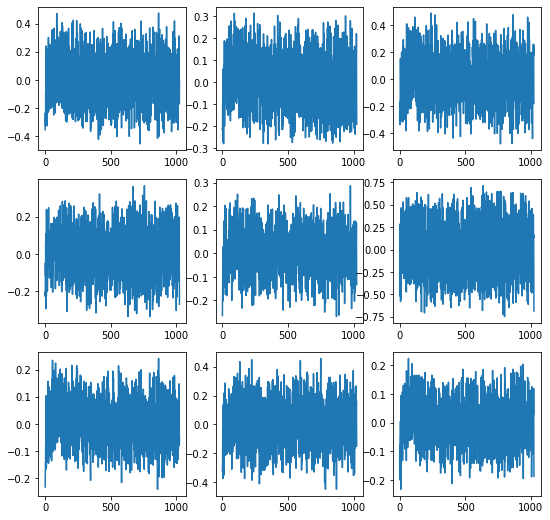

epoch-1; D_loss: 1.6152091026306152; G_loss: 0.46565645933151245


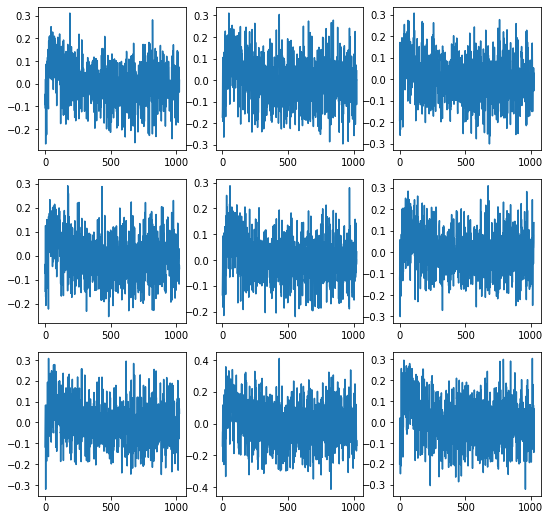

epoch-2; D_loss: 0.8213787078857422; G_loss: 1.9107060432434082


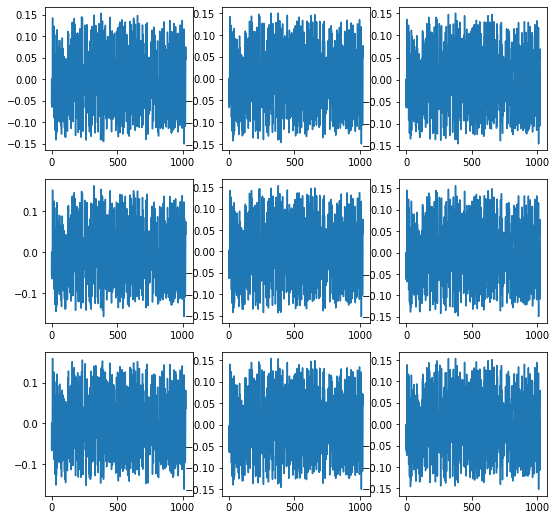

epoch-3; D_loss: 0.5133678317070007; G_loss: 3.549666404724121


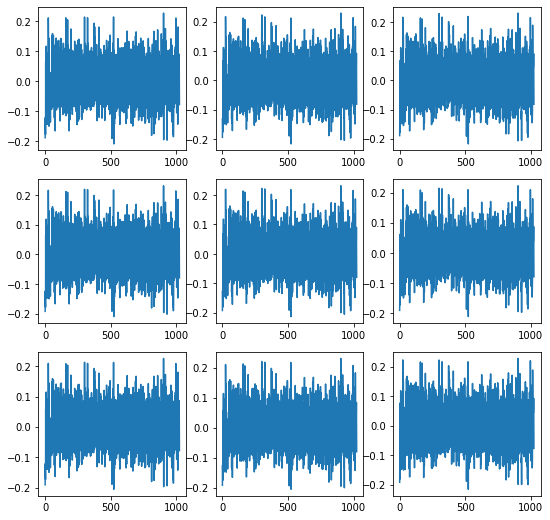

epoch-4; D_loss: 0.5203901529312134; G_loss: 2.060184955596924


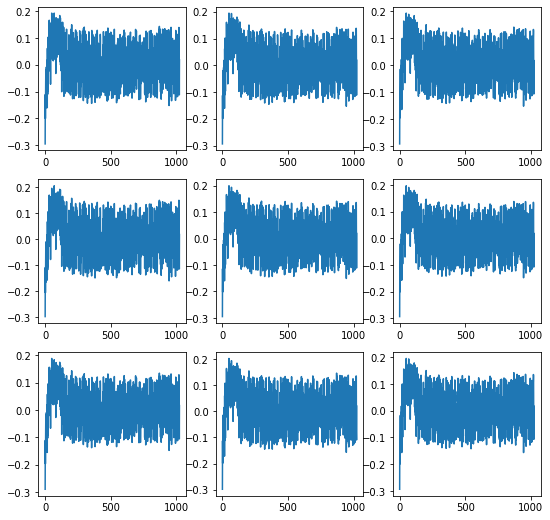

epoch-5; D_loss: 0.24148604273796082; G_loss: 3.5049901008605957


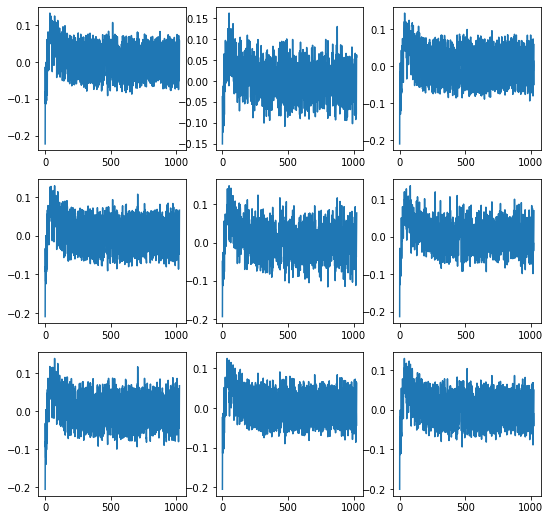

epoch-6; D_loss: 1.02030611038208; G_loss: 1.2062504291534424


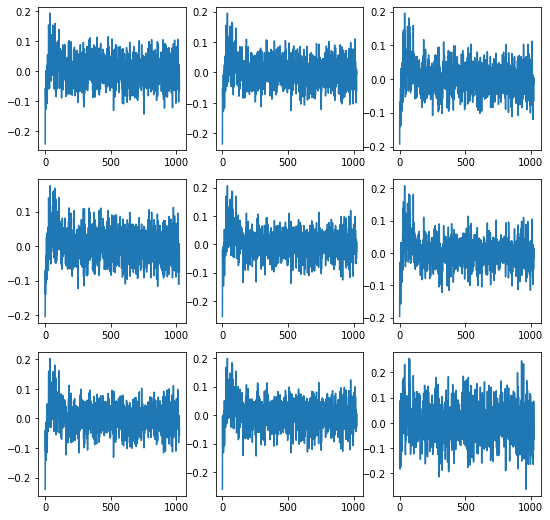

epoch-7; D_loss: 0.7350929975509644; G_loss: 1.1978431940078735


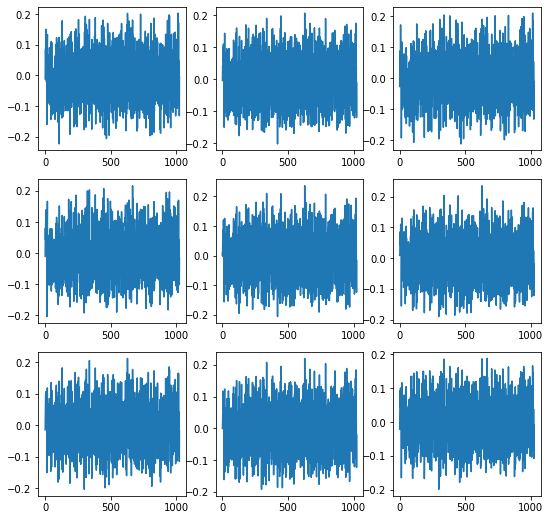

epoch-8; D_loss: 0.3762015998363495; G_loss: 2.752967596054077


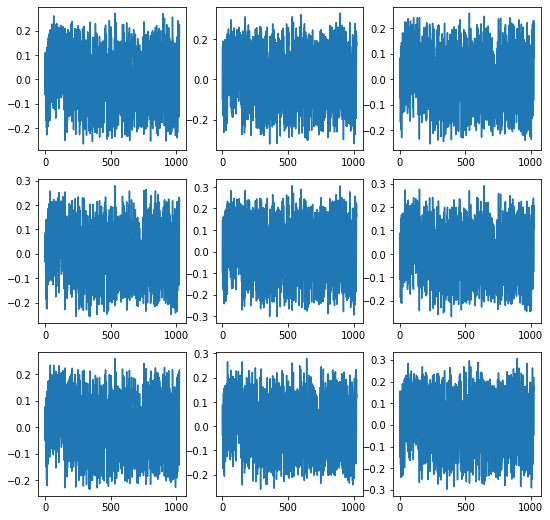

epoch-9; D_loss: 0.3093651235103607; G_loss: 3.639472246170044


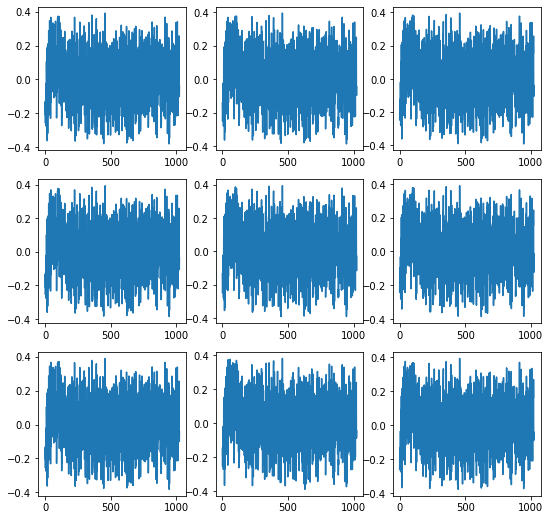

In [12]:
generator = run_train(dataset, \
          latent_dim=LATENT_DIM, \
          sample_size=SAMPLE_SIZE, \
          learning_rate=LEARNING_RATE, \
          num_epochs=NUM_EPOCHS, \
          batch_size=BATCH_SIZE, \
          print_each=PRINT_EACH, \
          verbose=VERBOSE, \
          no_save=NO_SAVE)